<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import datetime, os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

In [43]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#loading dataframes
train_df = pd.read_csv('drive/MyDrive/Digital Hand Atlas Dataset/Changed Dataset/Changed Dataset.csv')
test_df = pd.read_csv('drive/MyDrive/Digital Hand Atlas Dataset/Changed Dataset/Changed Dataset.csv')

#appending file extension to id column for both training and testing dataframes
train_df['Case ID'] = train_df['Case ID'].apply(lambda x: str(x)+'.png')
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 

train_df.head()

,Case ID,Bone Age,Male,Location
0,1 (1).png,0,False,Asian
1,1 (2).png,0,False,Asian
2,1 (3).png,0,False,Asian
3,1 (4).png,0,False,Asian
4,1 (5).png,0,False,Asian


Female    3705
Male      3688
Name: Gender, dtype: int64


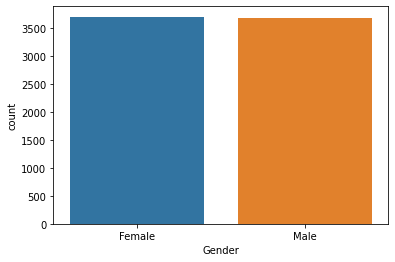

In [45]:
#finding out the number of male and female children in the dataset
#creating a new column called gender to keep the gender of the child as a string
train_df['Gender'] = train_df['Male'].apply(lambda x: 'Male' if x else 'Female')
print(train_df['Gender'].value_counts())
sns.countplot(x = train_df['Gender'])

In [51]:
#oldest child in the dataset
print('MAX age: ' + str(train_df['Bone Age'].max()) + ' Years Old')

#youngest child in the dataset
print('MIN age: ' + str(train_df['Bone Age'].min()) + ' Years Old (Baby)')

#mean age is
mean_bone_age = train_df['Bone Age'].mean()
print('mean: ' + str(mean_bone_age))

#median bone age
print('median: ' +str(train_df['Bone Age'].median()))

#standard deviation of boneage
std_bone_age = train_df['Bone Age'].std()

#models perform better when features are normalised to have zero mean and unity standard deviation
#using z score for the training
train_df['bone_age_z'] = (train_df['Bone Age'] - mean_bone_age)/(std_bone_age)

print(train_df.head())

MAX age: 18 Years Old
MIN age: 0 Years Old (Baby)
mean: 8.92790477478696
median: 9.0
     Case ID  Bone Age   Male Location  Gender  bone_age_z
0  1 (1).png         0  False    Asian  Female   -1.623842
1  1 (2).png         0  False    Asian  Female   -1.623842
2  1 (3).png         0  False    Asian  Female   -1.623842
3  1 (4).png         0  False    Asian  Female   -1.623842
4  1 (5).png         0  False    Asian  Female   -1.623842


Text(0.5, 1.0, 'Number of children in each age group')

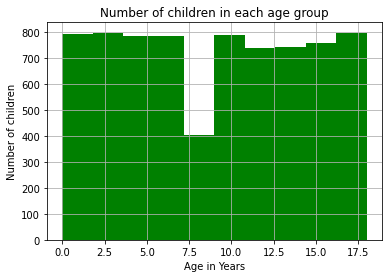

In [53]:
#plotting a histogram for bone ages
train_df['Bone Age'].hist(color = 'green')
plt.xlabel('Age in Years')
plt.ylabel('Number of children')
plt.title('Number of children in each age group')

Text(0.5, 1.0, 'Relationship between number of children and bone age z score')

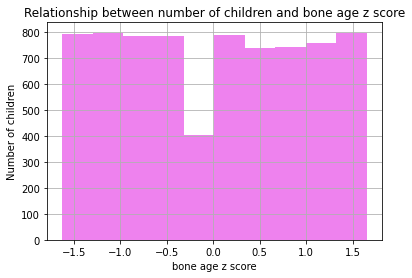

In [54]:
train_df['bone_age_z'].hist(color = 'violet')
plt.xlabel('bone age z score')
plt.ylabel('Number of children')
plt.title('Relationship between number of children and bone age z score')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


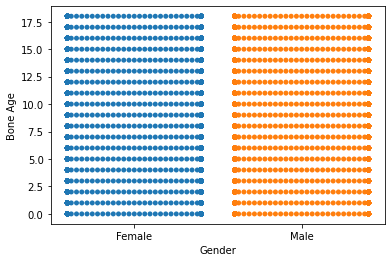

In [55]:
#Relationship between age and gender with a categorical scatter plot (swarmplot)
sns.swarmplot(x = train_df['Gender'], y = train_df['Bone Age'])

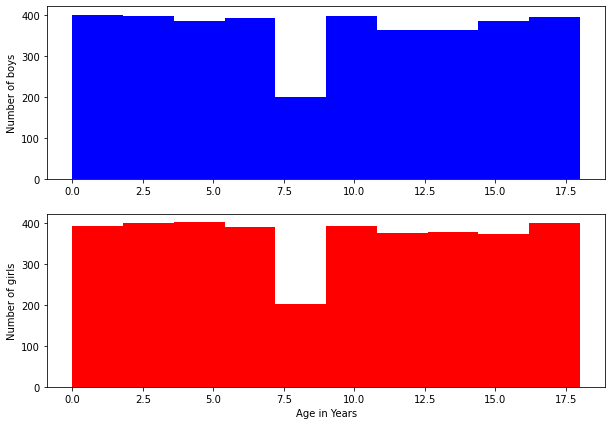

In [56]:
#distribution of age within each gender 
male = train_df[train_df['Gender'] == 'Male']
female = train_df[train_df['Gender'] == 'Female']
fig, ax = plt.subplots(2,1)
ax[0].hist(male['Bone Age'], color = 'blue')
ax[0].set_ylabel('Number of boys')
ax[1].hist(female['Bone Age'], color = 'red')
ax[1].set_xlabel('Age in Years')
ax[1].set_ylabel('Number of girls')
fig.set_size_inches((10,7))

In [57]:
#splitting train dataframe into traininng and validation dataframes
df_train, df_valid = train_test_split(train_df, test_size = 0.2, random_state = 0)

In [72]:
import matplotlib.image as mpimg
for filename, boneage, gender in train_df[['Case ID','Bone Age','Male']].sample(4).values:
    img = mpimg.imread('drive/MyDrive/Digital Hand Atlas Dataset/Changed Dataset/'+ filename)
    plt.imshow(img)
    plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage, gender))
    plt.axis('off')
    plt.show()

FileNotFoundError: ignored

In [ ]:
#library required for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  keras.applications.xception import preprocess_input 

#reducing down the size of the image 
img_size = 256

train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

#train data generator
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = df_train,
    directory = '.............................................................',
    x_col= 'id',
    y_col= 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

#validation data generator
val_generator = val_data_generator.flow_from_dataframe(
    dataframe = df_valid,
    directory = '..............................................................',
    x_col = 'id',
    y_col = 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    directory = '.............................................................',
    shuffle = True,
    class_mode = None,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

In [ ]:
test_X, test_Y = next(val_data_generator.flow_from_dataframe( 
                            df_valid, 
                            directory = '/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset',
                            x_col = 'id',
                            y_col = 'bone_age_z', 
                            target_size = (img_size, img_size),
                            batch_size = 2523,
                            class_mode = 'other'
                            )) 

In [ ]:
def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()

In [ ]:
from keras.metrics import mean_absolute_error
def mae_in_months(x_p, y_p):
    '''function to return mae in months'''
    return mean_absolute_error((std_bone_age*x_p + mean_bone_age), (std_bone_age*y_p + mean_bone_age)) 

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense,Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential

model_1 = tf.keras.applications.xception.Xception(input_shape = (img_size, img_size, 3),
                                           include_top = False,
                                           weights = 'imagenet')
model_1.trainable = True
model_2 = Sequential()
model_2.add(model_1)
model_2.add(GlobalMaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'linear'))


#compile model
model_2.compile(loss ='mse', optimizer= 'adam', metrics = [mae_in_months] )

#model summary
model_2.summary()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
logs_dir = '.\logs'
%tensorboard --logdir {logs_dir}

In [ ]:
#early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience= 5,
                              verbose=0, mode='auto')

#model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#tensorboard callback
logdir = os.path.join(logs_dir,datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback =  TensorBoard(logdir, histogram_freq = 1)

#reduce lr on plateau
red_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [tensorboard_callback,early_stopping,mc, red_lr_plat]


#fit model
history = model_2.fit_generator(train_generator,
                            steps_per_epoch = 315,
                            validation_data = val_generator,
                            validation_steps = 1,
                            epochs = 50,
                            callbacks= callbacks)
history
%tensorboard --logdir logs
plot_it(history)

In [ ]:
model_2.load_weights('best_model.h5')
pred = mean_bone_age + std_bone_age*(model_2.predict(test_X, batch_size = 32, verbose = True))
test_months = mean_bone_age + std_bone_age*(test_Y)

ord_ind = np.argsort(test_Y)
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)] # take 8 evenly spaced ones
fig, axs = plt.subplots(4, 2, figsize = (15, 30))
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(test_X[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, 
                                                           pred[ind]/12.0))
    ax.axis('off')
fig.savefig('trained_image_predictions.png', dpi = 300)

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(test_months, pred, 'r.', label = 'predictions')
ax.plot(test_months, test_months, 'b-', label = 'actual')
ax.legend(loc = 'upper right')
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

In [ ]:
test_generator.reset()
y_pred = model_2.predict_generator(test_generator)
predicted = y_pred.flatten()
predicted_months = mean_bone_age + std_bone_age*(predicted)
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions": predicted_months})
results.to_csv("results.csv",index=False)